# Análisis del mercado de salarios para Ciencia de Datos 2023
## Análisis de indicadores de empleo en el sector

**Giamportone, Ariel Luján.**

*UPGRADE HUB-Madrid,España. 2023*


## Introducción
En este análisis de datos exploratorio, inspirado por los conceptos descritos en la obra *El mercado laboral en el contexto de la cuarta revolución industrial, perfil del trabajador profesional de las ciencias administrativas: competencias y habilidades* de Virginia Guadalupe López Torres, Diego Alfredo Pérez Rivas y Oscar Galván Mendoza, el *Informe de Teletrabajo 2021* de RANDSTAD RESEARCH y la nota técnica *Desafíos y oportunidades del teletrabajo en América Latina y el Caribe* de Roxana Maurizio(2021). Se consideran, además, las tendencias en diversos medios de comunicación sobre el crecimiento exponencial de la oferta laboral y las bondades de la industría que circunda al mundo de las TIC.
En el análisis se utilizan herramientas de Análisis de Datos que se listan a continuación y que forman parte del presente trabajo. 
Lenguajes: Python
Entornos: Visual Studio Code
Librerias: Jupyter, Numpy, Pandas, Seaborn, Mathplotlib, Plotly. 
Control de versiones: GitHub.


In [1]:
import math
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

## Materiales y métodos
Se utiliza el conjunto de datos publicado por "buscar autor" que resulta útil para entender la distribución de los salarios en el campo de la ciencia de datos y cómo estos pueden variar en función de factores como la ubicación del empleado y del empleador, el nivel de experiencia, el tipo de empleo, entre otros. Nos permite explorar el impacto del trabajo remoto en los salarios de ciencia de datos y empezar a sacar nuestras propias conclusiones.



#### **Variables consideradas**

<table>
  <tr>
    <th>Nombre de la columna</th>
    <th>Descripción</th>
  </tr>
  <tr>
    <td>work_year</td>
    <td>El año en que se pagó el salario.</td>
  </tr>
  <tr>
    <td>experience_level</td>
    <td>El nivel de experiencia en el trabajo durante el año.</td>
  </tr>
  <tr>
    <td>employment_type</td>
    <td>El tipo de empleo para el rol.</td>
  </tr>
  <tr>
    <td>job_title</td>
    <td>El rol desempeñado durante el año.</td>
  </tr>
  <tr>
    <td>salary</td>
    <td>El total bruto del salario pagado.</td>
  </tr>
  <tr>
    <td>salary_currency</td>
    <td>La moneda del salario pagado como código de moneda ISO 4217.</td>
  </tr>
  <tr>
    <td>salaryinusd</td>
    <td>El salario en dólares estadounidenses (USD).</td>
  </tr>
  <tr>
    <td>employee_residence</td>
    <td>El principal país de residencia del empleado durante el año de trabajo como código de país ISO 3166.</td>
  </tr>
  <tr>
    <td>remote_ratio</td>
    <td>La cantidad total de trabajo realizado a distancia.</td>
  </tr>
  <tr>
    <td>company_location</td>
    <td>El país de la oficina principal del empleador o la sucursal contratante.</td>
  </tr>
  <tr>
    <td>company_size</td>
    <td>El número mediano de personas que trabajaron para la empresa durante el año.</td>
  </tr>
</table>


Para el presente estudio se aplican técnicas de análisis y visualización de datos utilizando las bibliotecas de Python Matplotlib, Seaborn y Plotly.
El protocolo de trabajo incluye:
 - **Exploración del conjunto de datos:** 
Explorar el conjunto de datos: Comprender la estructura del conjunto de datos, los tipos de variables presentes y cómo estas están distribuidas. Limpiar y preparar el conjunto de datos: Manipular los datos para que sean más accesibles y útiles para el análisis. Esto puede incluir tratar con valores faltantes, convertir tipos de datos y generar nuevas variables a partir de las existentes

 - **Analisis del conjunto de datos:** Extraer información útil y significativa del conjunto de datos a través de diversas técnicas de análisis de datos. Visualizar los datos: Crear gráficos y diagramas que ayuden a entender y comunicar los patrones y las relaciones presentes en los datos.


### **Preparación y preprocesamiento de los datos:**

In [2]:
df = pd.read_csv('datasets\ds_salaries.csv')


In [3]:
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


#### **Aproximación al conjunto de datos, Nº de entradas en las filas y Nº de variables en las columnas.**

In [4]:
num_filas = df.shape[0] 
num_columnas = df.shape[1]  

print(f"El DataFrame sobre el que trabajaremos tiene {num_filas} filas o entradas y {num_columnas} columnas o variables.")
(num_filas,num_columnas)

El DataFrame sobre el que trabajaremos tiene 3755 filas o entradas y 11 columnas o variables.


(3755, 11)

#### **Distinción de tipos de datos presentes las columnas del set de datos.**


In [5]:
df.dtypes


work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

#### **Comprobación de registros faltantes en el set de datos.**

In [6]:
registros_faltantes = df.isnull().any().any()

if registros_faltantes:
    print("¡Hay valores faltantes en el DataFrame!")
else:
    print("No se encontraron valores faltantes en el DataFrame.")

No se encontraron valores faltantes en el DataFrame.


In [7]:
heatmap2 = px.imshow(df.isnull(), text_auto=".2f", color_continuous_scale='Blues', aspect="auto")
heatmap2.update_traces(hovertemplate='Valor: {text}',
                       customdata=df.values.flatten())
heatmap2.update_layout(
    coloraxis_colorbar=dict(
        tickvals=[0, 1],
        ticktext=['Contiene registro', 'No contiene registro'],
    )
)

heatmap2.show()

#### Distribución y valores estádisticos de interés en el conjunto de datos. 

In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


Ver la frecuencia de los valores para los salarios para un histograma:

In [9]:
df['salary'].value_counts()


salary
100000    112
150000    100
120000     99
160000     85
130000     85
         ... 
241871      1
93919       1
385000      1
225900      1
412000      1
Name: count, Length: 815, dtype: int64

#### Visualización de variables numéricas:

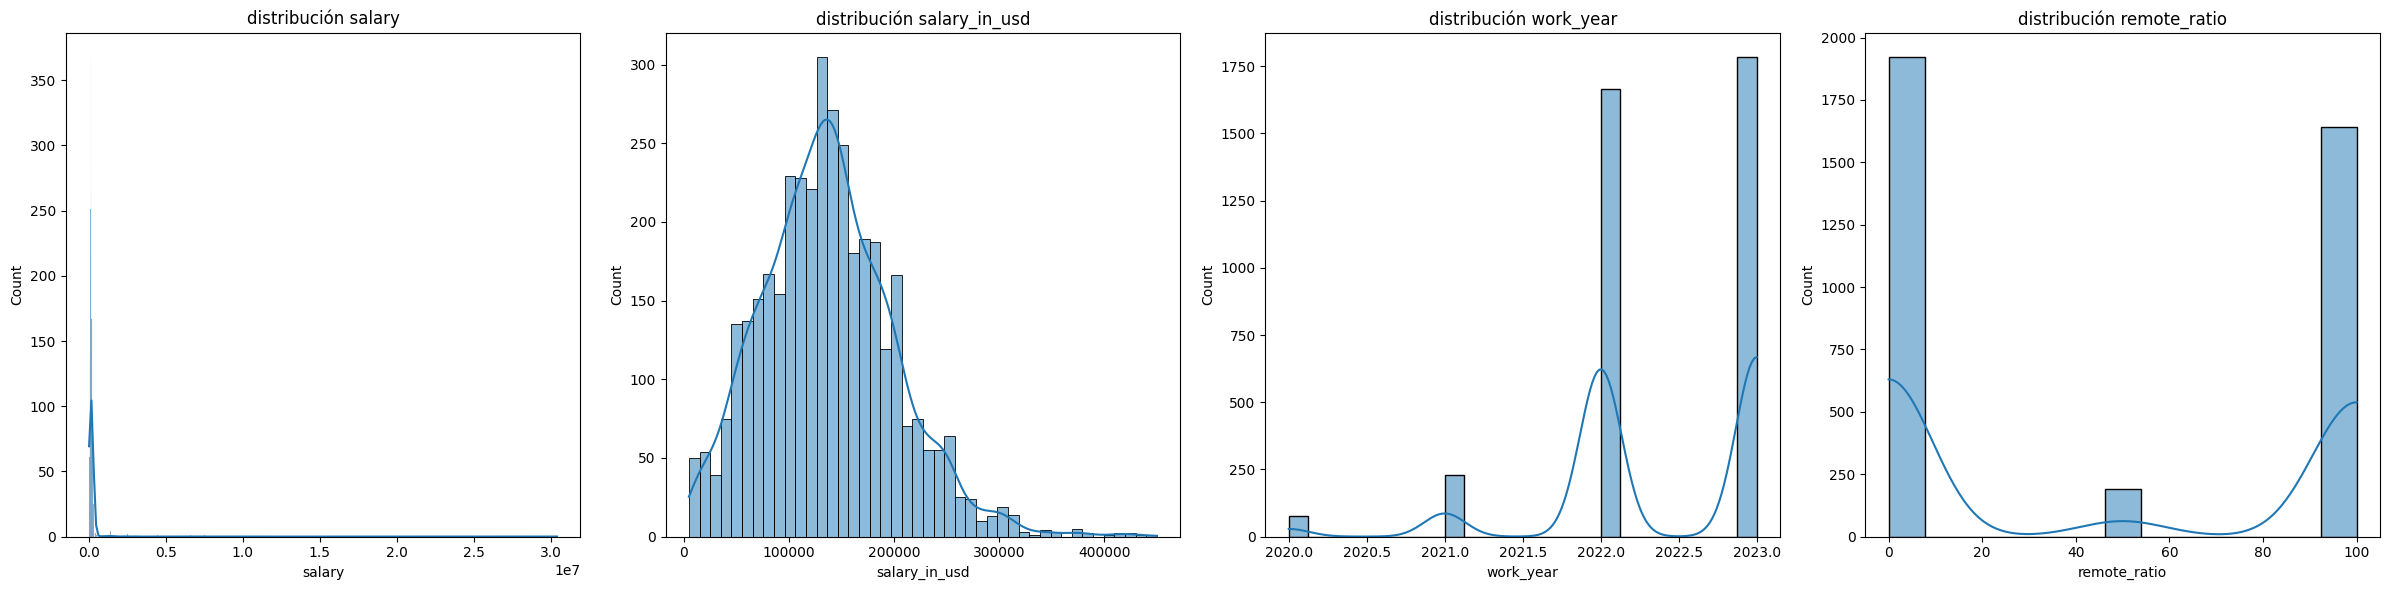

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24,6))
cols = ['salary', 'salary_in_usd', 'work_year', 'remote_ratio']

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f"distribución {col}")

plt.tight_layout()
plt.show()

#### Visualización de variables categóricas:

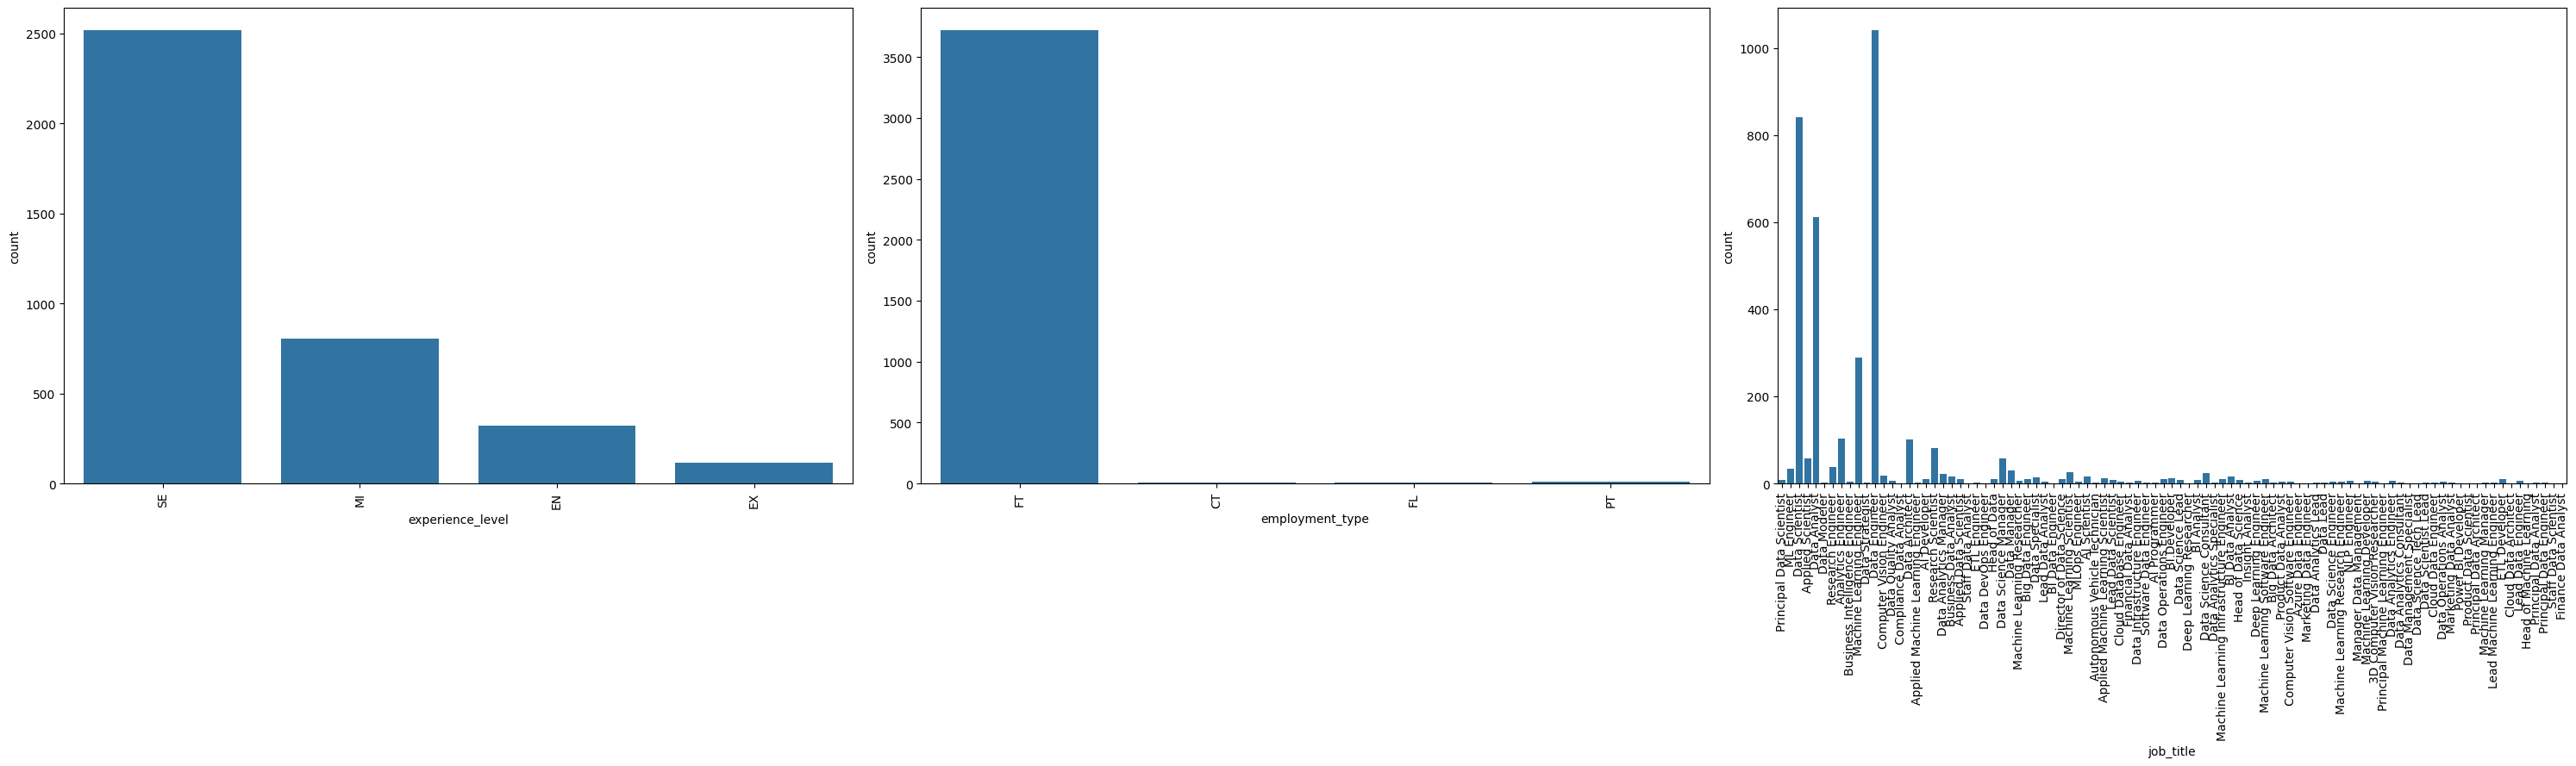

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 9))
cols = ['experience_level', 'employment_type', 'job_title']

for i, column in enumerate(cols):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

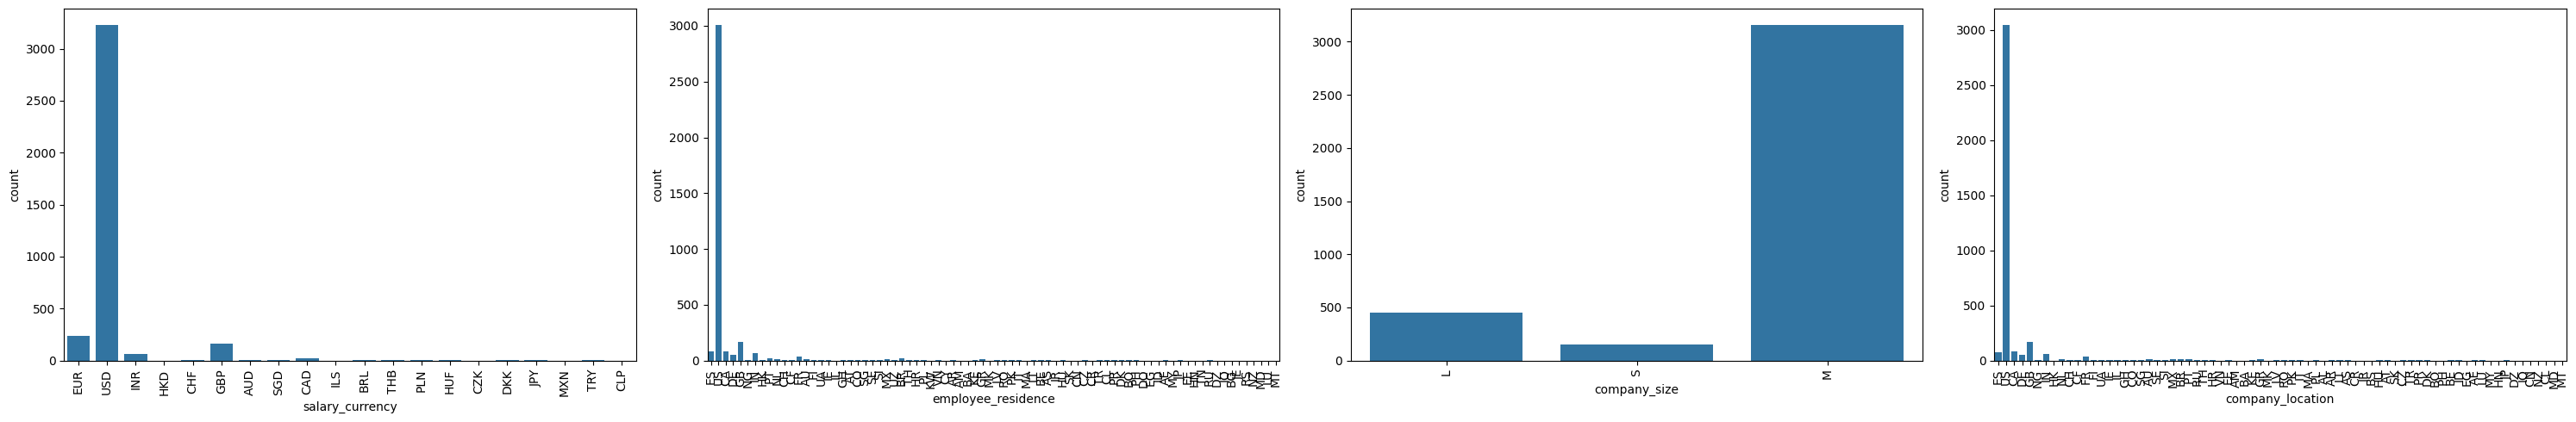

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 5))
cols = ['salary_currency', 'employee_residence', 'company_size', 'company_location']

for i, column in enumerate(cols):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

#### Orden descendente de frecuencias por titulo de la profesión:

In [13]:

top_profesiones = frecuencia_profesiones.sort_values(ascending=False).index.tolist()
df_top_profesiones = df[df['job_title'].isin(top_profesiones)]
fig = px.histogram(df_top_profesiones, x='job_title', title='Frecuencia de profesiones',
                   labels={'job_title': 'Profesiones', 'count': 'Frecuencia'},
                   category_orders={'job_title': top_profesiones})
fig.update_xaxes(tickangle=90)
fig.show()


NameError: name 'frecuencia_profesiones' is not defined

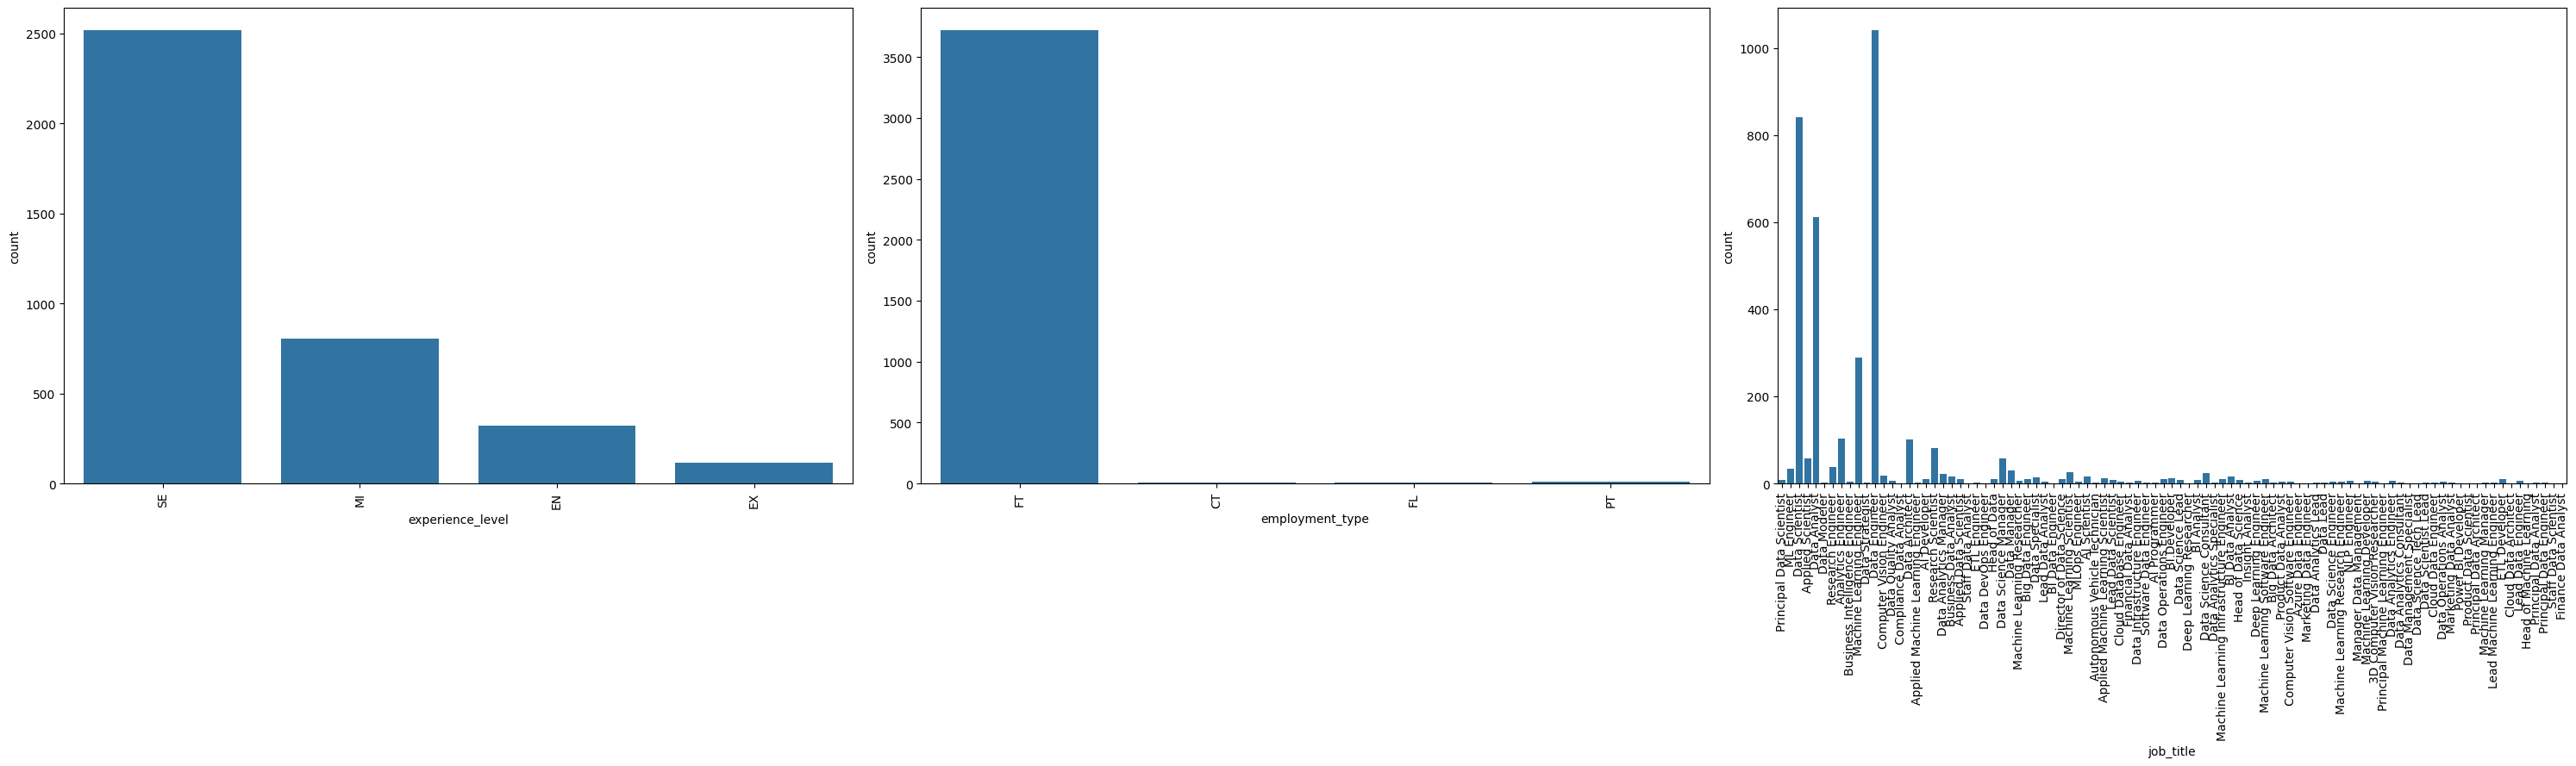

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 9))
cols = ['experience_level', 'employment_type', 'job_title']

for i, column in enumerate(cols):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

#### Visualización de valores atípicos: 

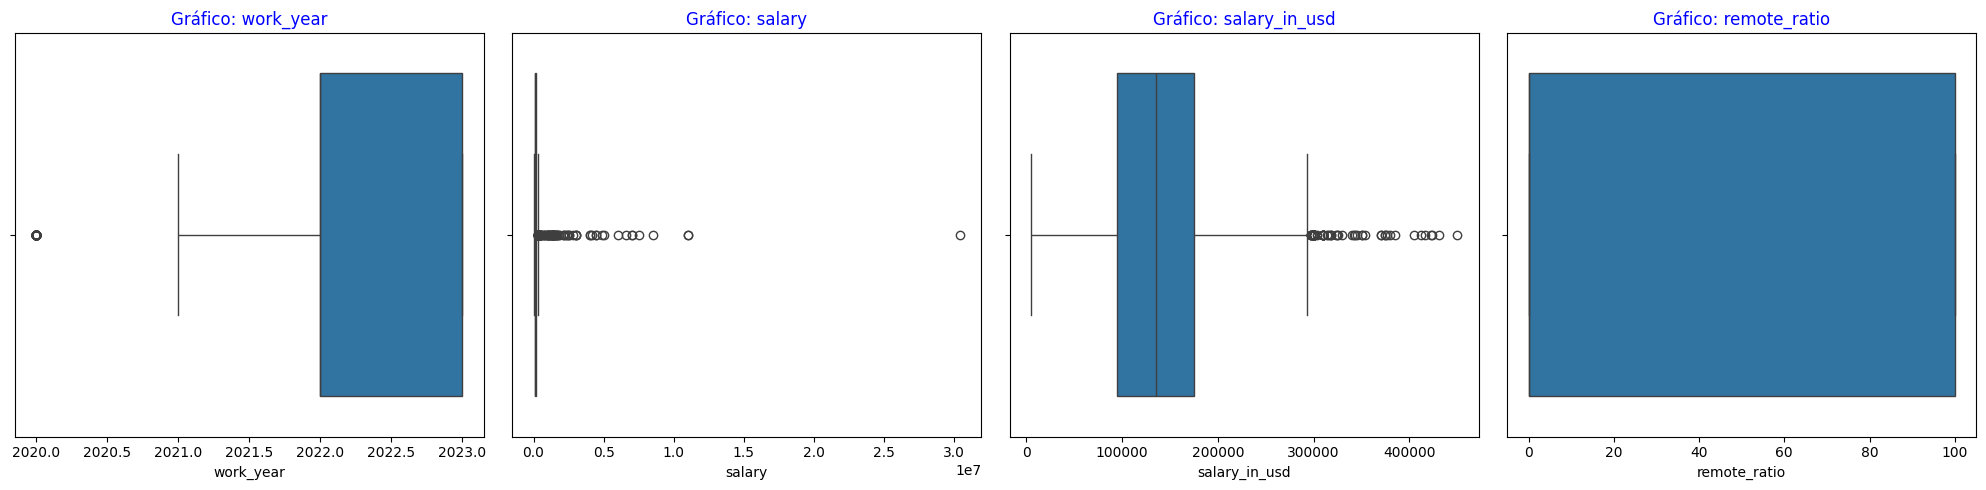

In [ ]:
def identificar_outliers(dataframe):
    
    numeric_cols = dataframe.select_dtypes(include=np.number).columns
    ncols = 4
    nrows = math.ceil(len(numeric_cols) / ncols) 
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5*nrows))

    if nrows == 1 or ncols == 1:
        axes = [axes]

    for i, col in enumerate(numeric_cols):
        row = i // ncols
        col_idx = i % ncols
    
        if len(dataframe[col].unique()) > 1:
            sns.boxplot(x=dataframe[col], data=dataframe, ax=axes[row][col_idx])
            axes[row][col_idx].set_title(f"Gráfico: {col}", color="Blue")
        else:
            print(f"La columna {col} tiene un solo valor único y no se puede graficar")
    plt.tight_layout()
    plt.show()
identificar_outliers(df)

## Resultados y Discusión 

#### Salario y experiencia del trabajador.
Es normal pensar que el nivel de experiencia hace que los arreglos salariales sean un factor de negociación para incorporar talentos a las empresas u organizaciones, es por ello que se comparan los salarios promedio con el nivel de experiencia de los profesionales. 
A través del estudio de datos precisos y de calidad, se ha llevado a cabo un análisis riguroso de múltiples aspectos del mercado laboral en el sector TIC, con el objetivo de proporcionar una visión completa y actualizada de las tendencias y dinámicas presentes en la industria.
Los principales análisis realizados incluyen:
Salario según el nivel de experiencia en la profesión: Se ha evaluado cómo varían los salarios en función de la experiencia laboral de los profesionales del sector, identificando posibles tendencias y patrones significativos.
Evolución salarial en los últimos tres años: Se ha examinado la trayectoria de los salarios a lo largo de un periodo de tres años para comprender las tendencias de crecimiento o declive en la remuneración de los trabajadores del sector TIC.
Salario promedio según el año: Se ha analizado el salario promedio anual para determinar posibles fluctuaciones o tendencias significativas a lo largo del tiempo.
Tipo de contratación respecto a la presencialidad: Se ha investigado la relación entre la modalidad de contratación (presencial o remota) y su impacto en los salarios y en la estructura laboral.
Proporción de trabajo remoto entre diferentes roles: Se ha evaluado la distribución de roles laborales según la modalidad de trabajo remoto, identificando la proporción relativa entre diferentes categorías de empleo.
Relación entre el tamaño de la empresa y el salario: Se han analizado las diferencias salariales basadas en el tamaño de la empresa, considerando posibles correlaciones entre este factor y la remuneración.
Este informe también aborda otros aspectos relevantes como la distribución geográfica del trabajo remoto, los salarios promedio más altos en moneda extranjera, la distribución de roles laborales según la categoría de experiencia, y la variación salarial entre tipos de empleo, ya sea a tiempo completo o parcial.
A través de estos análisis detallados, se busca proporcionar una comprensión profunda de los diversos factores que influyen en el mercado laboral y salarial del sector TIC, con el objetivo de ofrecer información valiosa para empleadores, profesionales y tomadores de decisiones en esta industria dinámica y en constante evolución.

##### Distribución de frecuencias de los salarios en Ciencias de Datos:

In [ ]:

histograma1 = px.histogram(df, x='salary', nbins=5000, title='Histograma para salarios',
                           labels={'salary_in_Euros': 'Valores de los salarios', 'Frecuencia': 'Frecuencia del salario'},
                           color_discrete_sequence=['lightblue'])  
histograma1.update_xaxes(range=[0, 400000])

histograma2 = px.histogram(df, x='salary_in_usd', nbins=5000,title='Histograma para salario en USD',
                           labels={'salary_in_usd': 'Valores salary in USD', 'Frecuencia': 'Frecuencia'},
                           color_discrete_sequence=['blue'])  
histograma2.update_xaxes(range=[0, 400000])

fig = px.histogram(df, x=['salary', 'salary_in_usd'], 
                   title='Distribución de salarios frecuentes en la industria',
                   color_discrete_sequence=['lightblue', 'blue'], 
                   labels={'value': 'Monto Salario', 'variable': 'Histograma para:'})
fig.update_xaxes(range=[0, 1000000])

fig.show()

##### Tabla de titulos de las profesiones según frecuencia en orden descentente:

In [ ]:
frecuencia_profesiones = df['job_title'].value_counts()
print("Frecuencia de profesiones:")
print(frecuencia_profesiones)

Frecuencia de profesiones:
job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64


##### Distribución salarial de acuerdo al nivel de experiencia del trabajador:

In [ ]:
salario_promedio_por_experiencia = df.groupby('experience_level')['salary_in_usd'].mean()
print("Salario promedio según nivel de experiencia:")
print(salario_promedio_por_experiencia)

Salario promedio según nivel de experiencia:
experience_level
EN     78546.284375
EX    194930.929825
MI    104525.939130
SE    153051.071542
Name: salary_in_usd, dtype: float64


In [ ]:
fig = px.box(df, x='experience_level', y='salary_in_usd',
             title='Distribución salarial por nivel de experiencia',
             labels={'experience_level': 'Nivel de Experiencia', 'salary_in_usd': 'Salario en USD'})

fig.update_layout(xaxis=dict(tickangle=90), width=1000, height=600)  
fig.show()

In [ ]:

salario_promedio_por_experiencia = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
fig = px.bar(salario_promedio_por_experiencia, x='experience_level', y='salary_in_usd',
             title='Salario promedio según nivel de experiencia',
             labels={'experience_level': 'Nivel de experiencia', 'salary_in_usd': 'Salario promedio en USD'})
fig.update_xaxes(title_text='Nivel de experiencia')
fig.update_yaxes(title_text='Salario promedio en USD')
fig.show()

##### Evolución salarial en los últimos tres años:
Luego del boom en el aumento del teletrabajo y las instancias hinbridas de trabajo que presento la pandemia producto del SARS "COVID-19" se estudia la evolución del salario en los últimos tres años para ver la tendencia:  

##### Salario promedio según el año:

In [ ]:
salario_promedio_por_año = df.groupby('work_year')['salary_in_usd'].mean()
df_salario_promedio = pd.DataFrame(salario_promedio_por_año)
print("Salario promedio según año de trabajo:")
print(df_salario_promedio)

Salario promedio según año de trabajo:
           salary_in_usd
work_year               
2020        92302.631579
2021        94087.208696
2022       133338.620793
2023       149045.541176


In [ ]:
fig = px.line(df_salario_promedio, x=df_salario_promedio.index, y='salary_in_usd', 
              title='Salario promedio según año de trabajo', labels={'salary_in_usd': 'Salario Promedio', 'index': 'Año'})

fig.show()

##### Diez empleos mas cotizados del mercado TIC en Ciencia de Datos:

In [ ]:
salario_promedio_por_empleo = df.groupby('job_title')['salary_in_usd'].mean()
top10_empleos_cotizados = salario_promedio_por_empleo.nlargest(10)

print("Top 10 de empleos más cotizados (con salarios promedio más altos):")
print(top10_empleos_cotizados)

Top 10 de empleos más cotizados (con salarios promedio más altos):
job_title
Data Science Tech Lead                375000.000000
Cloud Data Architect                  250000.000000
Data Lead                             212500.000000
Data Analytics Lead                   211254.500000
Principal Data Scientist              198171.125000
Director of Data Science              195140.727273
Principal Data Engineer               192500.000000
Machine Learning Software Engineer    192420.000000
Data Science Manager                  191278.775862
Applied Scientist                     190264.482759
Name: salary_in_usd, dtype: float64


In [ ]:
salario_promedio_por_empleo = df.groupby('job_title')['salary_in_usd'].mean()
top10_empleos_cotizados = salario_promedio_por_empleo.nlargest(10)
top10_df = top10_empleos_cotizados.reset_index()
top10_df.columns = ['job_title', 'salary_in_usd']

fig = px.bar(top10_df, x='salary_in_usd', y='job_title', orientation='h', 
             title='Diez empleos más cotizados en Ciencia de Datos con salarios promedio más altos',
             labels={'salary_in_usd': 'Salario Promedio en USD', 'job_title': 'Empleos'})
fig.update_layout(xaxis_title='Salario Promedio en USD', yaxis_title='Empleos')
fig.show()

#### Modalidad de trabajo, condiciones laborales y empresariales específicas:

La evolución del mercado y las tendencias de trabajo, además de los beneficios que presentan las modalidades de trabajo que surgen en los últimos diez años, y acompañados por el efecto de la pandemia hacen necesario considerar las variables de las tres principales categorias de contratación. Aunqué es sabido que en el rubro de las TIC es un factor central a la hora de negociar el contrato y que una ventaja ofrecida al profesional es la contratación remota.


##### Salario según tipo de empleo (Full Time, Contrato Temporal, Free Lance, Part Time)

In [ ]:
avg_salary_by_employment = df.groupby('employment_type')['salary_in_usd'].mean().reset_index()
avg_salary_by_employment_sorted = avg_salary_by_employment.sort_values('salary_in_usd', ascending=False)

fig = px.bar(avg_salary_by_employment_sorted, x='employment_type', y='salary_in_usd',
             title='Salario medio por tipo de empleo',
             labels={'employment_type': 'Tipo de empleo', 'salary_in_usd': 'Salario medio (USD)'})

fig.update_traces(marker=dict(color='blue'))  
fig.update_layout(width=800, height=500)  
fig.show()

##### Proporción de trabajo remoto entre diferentes roles:

In [ ]:
proporcion_trabajo_remoto = df.groupby('job_title')['remote_ratio'].mean()

print("Proporción de trabajo remoto por rol de trabajo:")
print(proporcion_trabajo_remoto)

Proporción de trabajo remoto por rol de trabajo:
job_title
3D Computer Vision Researcher     50.000000
AI Developer                      31.818182
AI Programmer                     50.000000
AI Scientist                      71.875000
Analytics Engineer                54.368932
                                    ...    
Research Engineer                 18.918919
Research Scientist                27.439024
Software Data Engineer            75.000000
Staff Data Analyst                 0.000000
Staff Data Scientist             100.000000
Name: remote_ratio, Length: 93, dtype: float64


In [ ]:
average_remote_ratio_per_job = df.groupby(["job_title"])["remote_ratio"].mean().reset_index()
average_remote_ratio_per_job_sorted = average_remote_ratio_per_job.sort_values('remote_ratio', ascending=False)

fig = px.bar(average_remote_ratio_per_job_sorted, x='remote_ratio', y='job_title',
             orientation='h',
             title='Proporción de trabajo remoto en los diferentes títulos de trabajo',
             labels={'remote_ratio': 'Remote Ratio (%)', 'job_title': 'Título del Trabajo'})
fig.update_layout(width=1000, height=800) 
fig.show()

##### Diez titulos profesionales con mayor frecuencia de modalidad remota:

In [ ]:
top10_empleos_remotos = df.groupby('job_title')['remote_ratio'].mean().nlargest(10)
print("Top 10 de empleos con mayor proporción de trabajo remoto:")
print(top10_empleos_remotos)

Top 10 de empleos con mayor proporción de trabajo remoto:
job_title
BI Data Engineer             100.0
Cloud Database Engineer      100.0
Compliance Data Analyst      100.0
Data Analytics Consultant    100.0
ETL Engineer                 100.0
MLOps Engineer               100.0
Manager Data Management      100.0
Marketing Data Analyst       100.0
Principal Data Analyst       100.0
Principal Data Architect     100.0
Name: remote_ratio, dtype: float64


In [ ]:
top10_empleos_remotos = df.groupby('job_title')['remote_ratio'].mean().nlargest(10)
top10_remotos_df = top10_empleos_remotos.reset_index()
top10_remotos_df.columns = ['job_title', 'remote_ratio']

fig = px.bar(top10_remotos_df, x='remote_ratio', y='job_title', orientation='h', 
             title='Diez empleos de Ciencia de Datos con mayor proporción de trabajo remoto',
             labels={'remote_ratio': 'Proporción de Trabajo Remoto', 'job_title': 'Empleos'})
fig.update_layout(xaxis_title='Proporción de Trabajo Remoto', yaxis_title='Empleos')
fig.show()

##### Relación entre el tamaño de la empresa y el salario.

In [ ]:
size_mapping = {'S': 1, 'M': 2, 'L': 3}  
df['company_size_numeric'] = df['company_size'].map(size_mapping)

fig = px.scatter(df, x='company_size_numeric', y='salary_in_usd', 
                 title='Relación entre tamaño de la empresa y salario en USD',
                 labels={'company_size_numeric': 'Tamaño de la empresa', 'salary_in_usd': 'Salario en USD'})
fig.update_layout(xaxis_title='Tamaño de la empresa', yaxis_title='Salario en USD')
fig.show()
correlacion = df['company_size_numeric'].corr(df['salary_in_usd'])
print(f"Correlación entre tamaño de empresa y salario: {correlacion}")

Correlación entre tamaño de empresa y salario: 0.0003723590888333126


##### Evolución de la proporción del trabajo remoto para Ciencia de Datos en los últimos tres años respecto del total:

In [ ]:
proporcion_remoto_por_año = df.groupby('work_year')['remote_ratio'].mean().reset_index()
fig = px.line(proporcion_remoto_por_año, x='work_year', y='remote_ratio', 
              title='Proporción promedio de trabajo remoto por año',
              labels={'work_year': 'Año', 'remote_ratio': 'Proporción Promedio de Trabajo Remoto'})
fig.update_layout(xaxis_title='Año', yaxis_title='Proporción Promedio de Trabajo Remoto')
fig.show()

##### Roles de trabajo y su distribución según la experiencía del trabajador.

In [ ]:
tabla_frecuencia_rol_catego = pd.crosstab(df['experience_level'], df['job_title'])
fig = px.imshow(tabla_frecuencia_rol_catego,
                labels=dict(x="Rol de trabajo", y="Categoría de experiencia", color="Frecuencia"),
                x=tabla_frecuencia_rol_catego.columns,
                y=tabla_frecuencia_rol_catego.index,
                color_continuous_scale='Blues') 
fig.update_layout(title='Distribución de roles de trabajo por categoría de experiencia',
                  margin = dict(t=50,r=20,b=20,l=15),
                  xaxis=dict(title='Titulo de la posición laboral', tickangle=90),
                  yaxis=dict(title='Categoría de experiencia'),
                  width=3000, height=600)  
fig.update_coloraxes(colorbar=dict(thickness=20, len=0.7, y=0.45))
fig.show()

#### Influencia Geográfica 

##### País con mayor cantidad de empleo remoto para las profesiones de Ciencia de Datos:

In [ ]:
remote_work_by_country = df.groupby("employee_residence")['remote_ratio'].sum().reset_index()
remote_work_by_country_sorted = remote_work_by_country.sort_values('remote_ratio', ascending=False)
fig = px.bar(remote_work_by_country_sorted, x='employee_residence', y='remote_ratio',
             title='Proporción de trabajo remoto por país (Orden descendente)',
             labels={'employee_residence': 'País', 'remote_ratio': 'Proporción de Trabajo Remoto'})

fig.update_layout(xaxis_title='País', yaxis_title='Proporción de Trabajo Remoto')

fig.update_xaxes(tickangle=90)
fig.show()

In [ ]:
# Calcular la cantidad total de trabajadores remotos por país
trabajadores_remotos_por_pais = df.groupby('employee_residence')['remote_ratio'].sum()

# Encontrar el país con más trabajadores remotos
pais_con_mas_remotos = trabajadores_remotos_por_pais.idxmax()
cantidad_mas_remotos = trabajadores_remotos_por_pais.max()

print(f"País con más trabajadores remotos: {pais_con_mas_remotos}")
print(f"Cantidad de trabajadores remotos en {pais_con_mas_remotos}: {cantidad_mas_remotos}")

País con más trabajadores remotos: US
Cantidad de trabajadores remotos en US: 131950


##### Países con salarios más alto y mas bajo en USD:

In [ ]:
salario_promedio_por_pais = df.groupby('employee_residence')['salary_in_usd'].mean().reset_index()

salario_promedio_por_pais_sorted = salario_promedio_por_pais.sort_values('salary_in_usd', ascending=False)

fig = px.bar(salario_promedio_por_pais_sorted, x='employee_residence', y='salary_in_usd',
             title='Salario Promedio por País',
             labels={'employee_residence': 'País', 'salary_in_usd': 'Salario Promedio (USD)'})

fig.update_layout(xaxis_title='País', yaxis_title='Salario Promedio (USD)')

fig.update_xaxes(categoryorder='total descending')

fig.show()
print(f"País con los salarios promedio más altos en USD: {pais_salario_mas_alto}")
print(f"Salario promedio más alto en USD en {pais_salario_mas_alto}: {salario_mas_alto}")
print(f"País con los salarios promedio más bajos en USD: {pais_salario_mas_bajo}")
print(f"Salario promedio más bajo en USD en {pais_salario_mas_bajo}: {salario_mas_bajo}")

País con los salarios promedio más altos en USD: IL
Salario promedio más alto en USD en IL: 423834.0
País con los salarios promedio más bajos en USD: MK
Salario promedio más bajo en USD en MK: 6304.0


## Conclusiones

El trabajo ha evolucionado a lo largo de la historia, adaptándose a los avances tecnológicos. Sin embargo, es evidente que el progreso de la tecnología avanza más rápido que las decisiones que las organizaciones pueden tomar para evitar fluctuaciones en sus equipos de profesionales. En el mundo de las Tecnologías de la Información y Comunicación (TIC), especialmente en las carreras emergentes derivadas de la industria 4.0, como el campo de la Ciencia de Datos, se hace más evidente la necesidad de que las organizaciones compitan y se esfuercen por adquirir y mantener talentos.
Los profesionales en ciencias de datos están altamente demandados debido a la escasez de expertos con experiencia y formación para ocupar las vacantes. Además, las organizaciones que forman equipos en este campo generan una fuerte competitividad y un aumento significativo en la inteligencia competitiva dentro de sus áreas de especialización.
En este contexto, el análisis de las condiciones laborales, los salarios y la flexibilidad geográfica, particularmente en relación con la modalidad de trabajo remoto que surge de las nuevas tecnologías y carreras profesionales, conforma un conjunto de factores necesarios para que los departamentos de recursos humanos de las organizaciones tengan un referente al buscar candidatos y tratar de persuadirlos para que permanezcan en sus equipos de talento.
De los datos analizados, se desprenden tendencias marcadas por el efecto que significó la pandemia del COVID-19. Durante este período, los plazos se aceleraron en la transición hacia la digitalización y el trabajo remoto. No obstante, se observa un efecto tipo "latigazo", especialmente en lo referente a las condiciones laborales, particularmente el retorno a la presencialidad.
Otro factor a considerar es que los talentos tienden a migrar, relacionado con el tamaño de las empresas. En la era industrial, existía una correlación entre el tamaño de la empresa y los talentos de la ingeniería que marcaban la diferencia competitiva y establecían tendencias. En el contexto actual, se observa que no existe una correlación entre el tamaño de la empresa y el salario. Esto sugiere que, en este campo profesional, el factor de negociación para la adquisición de talento es una combinación entre el salario y las demás condiciones laborales, las cuales ejercen un mayor peso en la decisión del trabajador al evaluar diferentes ofertas.
Por último, se destaca, a través del siguiente gráfico, la tendencia de los empleos más demandados durante el período 2020-2023. Esto marca las necesidades empresariales y puede ser un factor decisivo para jóvenes talentos que ingresan al mundo de la ciencia de datos y que buscan orientarse en las diversas ramas de trabajo disponibles.

In [ ]:
top10_empleos_demandados = df['job_title'].value_counts().nlargest(10)

top10_empleos_demandados_df = pd.DataFrame({'job_title': top10_empleos_demandados.index, 'count': top10_empleos_demandados.values})

fig = px.bar(top10_empleos_demandados_df, x='job_title', y='count',
             title='Top 10 de Empleos Más Demandados',
             labels={'job_title': 'Título del Empleo', 'count': 'Cantidad'})

fig.update_layout(xaxis_title='Título del Empleo', yaxis_title='Cantidad')
fig.show()

## Agradecimientos

A Andrés Mateo Piñol y Demetrio Esteban Alférez por su paciencia, aporte de datos y técnicas de análisis y el acompañamiento continuo en la formación.
